In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import networkx as nx

Epoch 1/100


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4476 - mae: 0.5321  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4070 - mae: 0.5061 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3178 - mae: 0.4547 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3166 - mae: 0.4540 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3001 - mae: 0.4458 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2727 - mae: 0.4273 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2634 - mae: 0.4201 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2406 - mae: 0.4058 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2227 - mae: 0.3911 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2355 - mae: 0.4031 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2343 - mae: 0.4008 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2223 - mae: 0.3916 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━

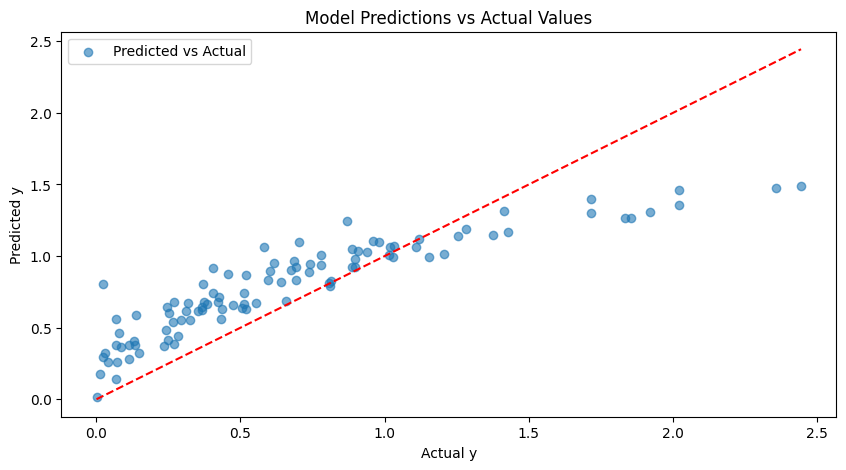

In [42]:
# Generate random training data
np.random.seed(42)
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)
x3 = np.random.rand(1000)
z_true = x1 + 2 * x2
y_true = x3 * z_true  # True output

# Prepare input data
X = np.column_stack((x1, x2, x3))
y = y_true.reshape(-1, 1)  # Reshape for TensorFlow

# Define neural network with no hidden layers
inputs = keras.Input(shape=(3,))
output = layers.Dense(1, use_bias=False, name="linear_combination")(inputs)

model = keras.Model(inputs=inputs, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and store loss values
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Extract trained weights
weights = model.get_layer("linear_combination").get_weights()[0].flatten()
print(f"Learned weights: {weights}")

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Final Loss: {loss}, Final MAE: {mae}")

# Predict on test data
x1_test = np.random.rand(100)
x2_test = np.random.rand(100)
x3_test = np.random.rand(100)
X_test = np.column_stack((x1_test, x2_test, x3_test))

# Compute true test output
y_true_test = x3_test * (x1_test + 2 * x2_test)

# Predict
y_pred = model.predict(X_test)

# Compute test MAE
test_mae = np.mean(np.abs(y_true_test - y_pred.flatten()))
print(f"Test MAE: {test_mae}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_true_test, y_pred, label='Predicted vs Actual', alpha=0.6)
plt.plot([min(y_true_test), max(y_true_test)], [min(y_true_test), max(y_true_test)], color='red', linestyle='--')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()

Epoch 1/100


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5747 - mae: 0.5719  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4906 - mae: 0.5226 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4188 - mae: 0.4880 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3855 - mae: 0.4720 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3438 - mae: 0.4469 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2958 - mae: 0.4213 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2607 - mae: 0.3986 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2520 - mae: 0.3891 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2513 - mae: 0.3957 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2322 - mae: 0.3836 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2189 - mae: 0.3736 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2080 - mae: 0.3629 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━

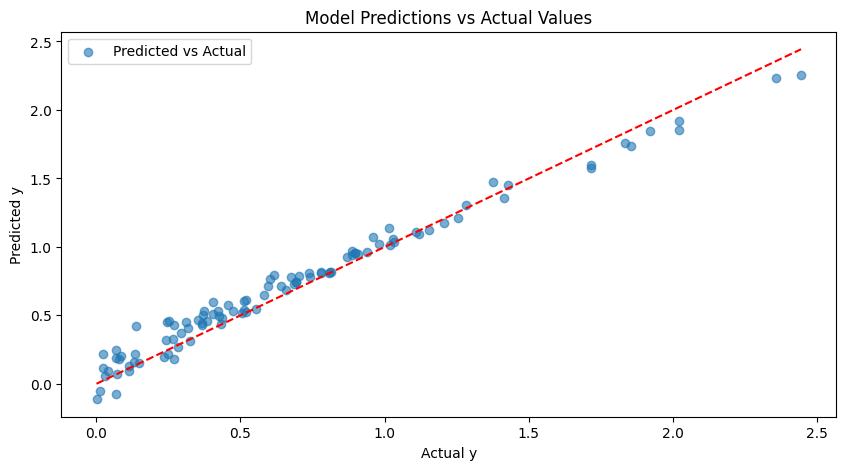

In [47]:
# Create additional features by multiplying inputs
x1_x2 = x1 * x2
x1_x3 = x1 * x3
x2_x3 = x2 * x3

# Prepare input data
X = np.column_stack((x1, x2, x3, x1_x2, x1_x3, x2_x3))
y = y_true.reshape(-1, 1)  # Reshape for TensorFlow

# Define neural network with no hidden layers
inputs = keras.Input(shape=(6,))
output = layers.Dense(1, use_bias=False, name="linear_combination")(inputs)

model = keras.Model(inputs=inputs, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and store loss values
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Extract trained weights
weights = model.get_layer("linear_combination").get_weights()[0].flatten()
print(f"Learned weights: {weights}")

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Final Loss: {loss}, Final MAE: {mae}")

x1_x2_test = x1_test * x2_test
x1_x3_test = x1_test * x3_test
x2_x3_test = x2_test * x3_test
X_test = np.column_stack((x1_test, x2_test, x3_test, x1_x2_test, x1_x3_test, x2_x3_test))
y_pred = model.predict(X_test)

# Compute test MAE
test_mae = np.mean(np.abs(y_true_test - y_pred.flatten()))
print(f"Test MAE: {test_mae}")

plt.figure(figsize=(10, 5))
plt.scatter(y_true_test, y_pred, label='Predicted vs Actual', alpha=0.6)
plt.plot([min(y_true_test), max(y_true_test)], [min(y_true_test), max(y_true_test)], color='red', linestyle='--')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9392 - mae: 0.7670   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9012 - mae: 0.7454 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9302 - mae: 0.7294 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7808 - mae: 0.6458 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6382 - mae: 0.5797 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3808 - mae: 0.4797 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3349 - mae: 0.4726 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3222 - mae: 0.4677 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2998 - mae: 0.4515 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2803 - mae: 0.4362 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2455 - mae: 0.4176 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2561 - mae: 0.4207 
Epoch 13/100
32/32 ━━━━

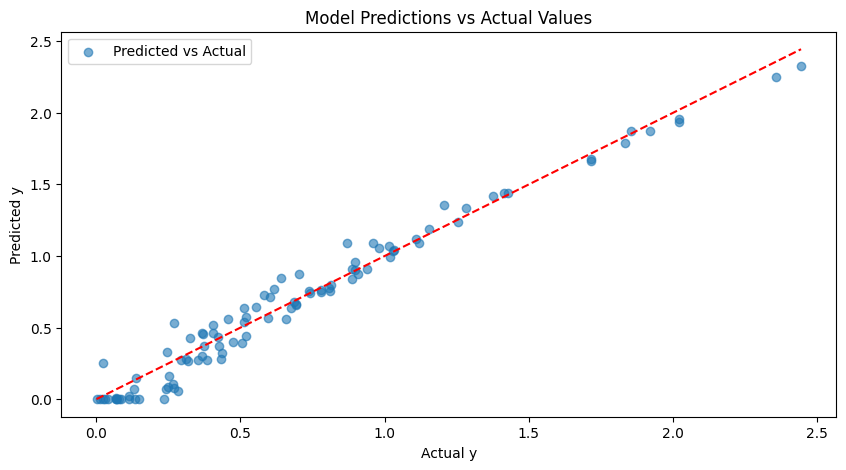

In [48]:
# Define neural network with a basic hidden layer
inputs = keras.Input(shape=(6,))
hidden = layers.Dense(1, activation='relu', name="hidden_layer")(inputs)
output = layers.Dense(1, use_bias=False, name="linear_combination")(hidden)

model = keras.Model(inputs=inputs, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and store loss values
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Extract trained weights
weights_hidden = model.get_layer("hidden_layer").get_weights()[0]
weights_output = model.get_layer("linear_combination").get_weights()[0].flatten()
print(f"Hidden layer weights: {weights_hidden}")
print(f"Output layer weights: {weights_output}")

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Final Loss: {loss}, Final MAE: {mae}")

# Predict
y_pred = model.predict(X_test)

# Compute test MAE
test_mae = np.mean(np.abs(y_true_test - y_pred.flatten()))
print(f"Test MAE: {test_mae}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_true_test, y_pred, label='Predicted vs Actual', alpha=0.6)
plt.plot([min(y_true_test), max(y_true_test)], [min(y_true_test), max(y_true_test)], color='red', linestyle='--')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()


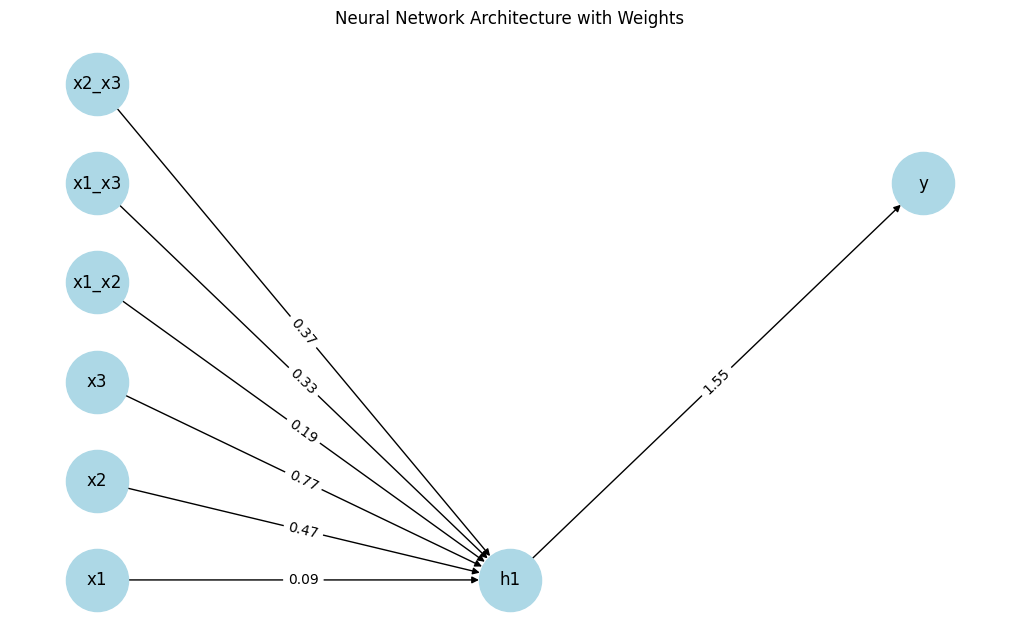

Detailed Calculation for Sample 0:
Input: [0.67270299 0.09262548 0.55337119 0.06230944 0.37225446 0.05125627]
Hidden Layer Activations: [0.68146231]
Predicted Output: 1.0574022356487205


In [49]:
# Visualize the neural network with weights
def plot_neural_network(weights_hidden, weights_output):
    G = nx.DiGraph()
    input_nodes = ["x1", "x2", "x3", "x1_x2", "x1_x3", "x2_x3"]
    hidden_nodes = [f"h{i+1}" for i in range(1)]
    output_node = "y"
    
    for i, input_node in enumerate(input_nodes):
        for j, hidden_node in enumerate(hidden_nodes):
            G.add_edge(input_node, hidden_node, weight=weights_hidden[i, j])
    
    for j, hidden_node in enumerate(hidden_nodes):
        G.add_edge(hidden_node, output_node, weight=weights_output[j])
    
    pos = {**{node: (0, i) for i, node in enumerate(input_nodes)},
           **{node: (1, i) for i, node in enumerate(hidden_nodes)},
           output_node: (2, 4)}
    
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue')
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Neural Network Architecture with Weights")
    plt.show()

plot_neural_network(weights_hidden, weights_output)

# Detailed calculation example
sample_index = 0
sample_input = X_test[sample_index]
hidden_activations = np.maximum(0, np.dot(sample_input, weights_hidden))
predicted_output = np.dot(hidden_activations, weights_output)
print(f"Detailed Calculation for Sample {sample_index}:")
print(f"Input: {sample_input}")
print(f"Hidden Layer Activations: {hidden_activations}")
print(f"Predicted Output: {predicted_output}")
